# Logistic Regression - Iris Classification

Contrary to its name, logistic regression is normally used for classification. It can consist of one or more independent variables and its outcome is measured by a categorial variable.

In [27]:
from sklearn import linear_model, datasets

import matplotlib.pyplot as plt
import numpy as np

Just like in previous notebooks we use `sckit-learn` in order to construct a model, this time for Logistic Regression. When plotting it however this time we're going to plot the decision boundaries as well. In order to do we're going use a meshgrid to visualize (seen further below). To plot the meshgrid we'll use `np.arange` to get the create series that will span the minimum and maximum values for each axis, then pass them to the `np.meshgrid` function. We also need `np.c_` in order to translate slice objects to concatenation along the second axis (i.e. concataneate [[1, 2, 3]], 0, 0, [[4, 5, 6]] into [[1,2,3,0,04,5,6]]). `ravel` is used to return a contiguous flattened array. 

In [72]:
def irisClassificationSepalPlot(data):
    X = iris.data[:, :2]
    Y = iris.target
    
    model = linear_model.LogisticRegression()
    model.fit(X, Y)
    
    h = .02
    
    # Plotting decision boundary for sepal plot 
    # Make sure we assign a color to each point in the mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.show()
    
    return model

This time we'll use the iris dataset, which consists of 50 samples from each of three species of iris flowers. Each sample measures four features (sepal length, sepal width, petal lenght and petal width). 

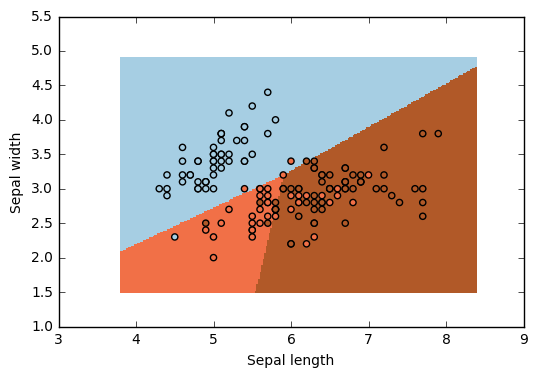

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
iris = datasets.load_iris()
irisClassificationSepalPlot(iris)

In [74]:
def irisClassificationPetalPlot(data):
    X = iris.data[:, 2:4]
    Y = iris.target
    
    model = linear_model.LogisticRegression()
    model.fit(X, Y)
    
    h = .02
    
    # Plotting decision boundary for sepal plot 
    # Make sure we assign a color to each point in the mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.show()
    
    return model

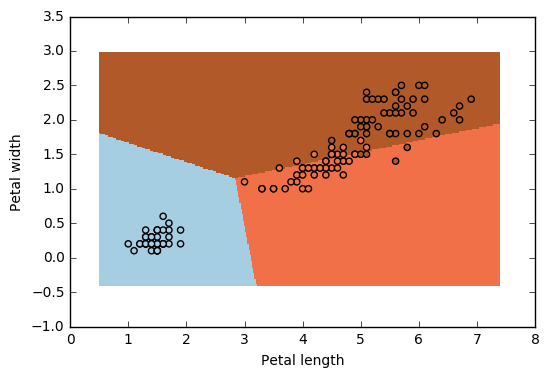

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
irisClassificationPetalPlot(iris)

Both of the plots above have shown pretty good examples of how well a 3-class Classifier can work. Using Petal width/length at first glance seems to be more accurate than Sepal width/length but we actually don't have to choose between them. We can use all 4 features together and obtain a (potentially) even more accurate 3-class Classifier.

But since that's really hard to show via plots let's instead examine how we were able to classify between three classes. The logistic function is used during ordinary logistic regression, making the hypothesis:

\begin{align}
{g(x)} = \frac{1}{1 + e^{x}}
\end{align}

\begin{align}
{h(x)} = {g({\beta_0} + {\beta_1}{x_1} + {\beta_2}{x_2}..)}
\end{align}

Giving us the chance to predict:

- $ y = 1 $ if $ h(x) \geq 0.5 $
- $ y = 0 $ if $ h(x) \lt 0.5 $

But this is only a binary classification. In the above example we showed a 3-class classification. How did we achieve that? One way to do that is the 1 vs all technique. Rather than comparing all three 3 together we compare one against all other options. For above we had the option of the flower being classified as iris-setosa, iris-virginica or iris-versicolor. We could train a single classifer per class:

- iris-setosa vs (iris-virginica or iris-versicolor)
- iris-virginica vs ( iris-setosa or iris-versicolor)
- iris-versicolor vs ( iris-setosa or iris-virginica)
